In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
df = load_diabetes()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
#dataset

In [6]:
# setting up independent(X) and dependent(y) features
X = dataset
y = df.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [8]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# implementing Linear Regression
from sklearn.linear_model import LinearRegression
## cross validation - divides train data into batches and gets accuracy score of each batch.
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train,y_train)
mse = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
mean = np.mean(mse)
mean

-3167.86163130161

In [10]:
# prediction
reg_pred = regression.predict(X_test)
reg_pred

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

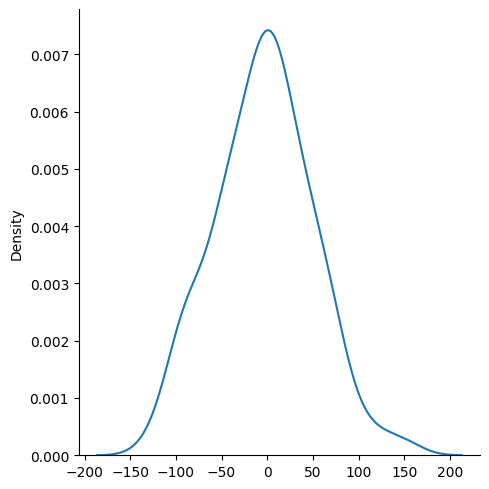

In [11]:
# checking the predicted values what level of correctness they have
import seaborn as sns
sns.displot(reg_pred-y_test, kind = 'kde')

In [12]:
# accuracy score
from sklearn.metrics import r2_score
score = r2_score(reg_pred, y_test)
score

0.0580179896169275

# Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [14]:
ridge_regressor = Ridge()
parameters = {'alpha':[1,2,3,4,5,6,7,11,13,17,19]}
ridgeCV = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgeCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 11, 13, 17, 19]},
             scoring='neg_mean_squared_error')

In [17]:
print(ridgeCV.best_params_)
print(ridgeCV.best_score_)

{'alpha': 1}
-3165.461652918005


In [18]:
ridge_pred = ridgeCV.predict(X_test)
ridge_pred

array([138.82208028, 181.5975227 , 127.15134107, 293.26350164,
       123.29523239,  92.48332492, 256.9314626 , 179.48184812,
        83.2081883 , 109.97258757,  94.79487003, 164.19563339,
        60.3144801 , 205.75255651,  97.55722009, 131.56609313,
       214.9837202 , 251.38888676, 199.45720557, 218.37353731,
       202.97956168,  88.20775135,  71.31380932, 186.74787794,
       156.20706454, 163.63111148, 192.3267887 , 183.64502295,
        47.27622623, 108.88526184, 179.84422408,  92.78365664,
       127.41942121, 182.90507584, 172.15482689, 189.70225925,
       121.33877856, 117.36073552, 145.11503802,  59.25863732,
        73.59647765, 107.53019551, 165.04506615, 151.81510635,
       166.25350167,  64.25301763,  75.60213737, 107.94187637,
        56.51779184, 162.9623704 , 153.81813207,  64.57409423,
       114.47877545, 108.13011769, 178.17759159, 160.21497304,
        95.15994195, 208.80271077, 117.73876164,  67.4148732 ,
       188.07412396, 203.70990787, 140.65943612, 105.80

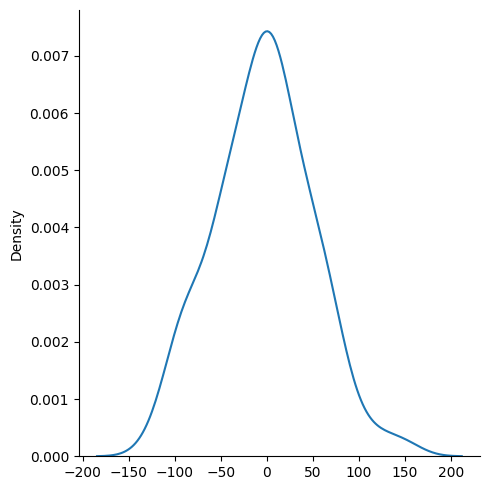

In [19]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind = 'kde')

In [21]:
from sklearn.metrics import r2_score
score = r2_score(ridge_pred, y_test)
score

0.04315711129292277

In [22]:
# Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_cv = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

lasso_pred = lasso_cv.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
score = r2_score(lasso_pred, y_test)
score

-0.013919551467584723